# Introduction to SIFT (Scale-Invariant Feature Transform)

SIFT is an algorithm proposed in 2004 for overcoming the scale invariance of Harris corner detection. Harris corner detection is a method that is rotation-invariant and limitedly invariant to photometric changes. However, when scale is increased, the corners spread out and get a flattened effect. SIFT solves this by searching for local minimas and maximas in a scale-space.

1. Creation of scale-sensitive space: 
- progressively blurring out images, incrementing the sigma parameter.
- get the blurring done for different image size (a pyramid of 4 levels is recommended in the original paper).
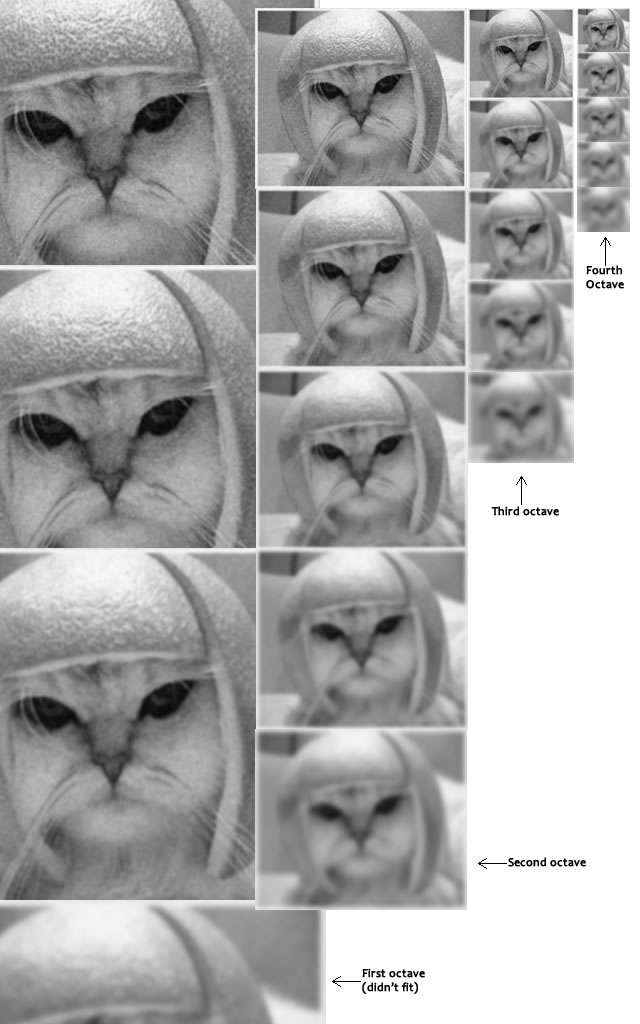 Image source: aishack.in

2. How to detect local minimas/maximas from all the blurred images?
    - Laplacian (second-order derivative) is too expensive.
    - Alternative, difference of Gaussiance.
    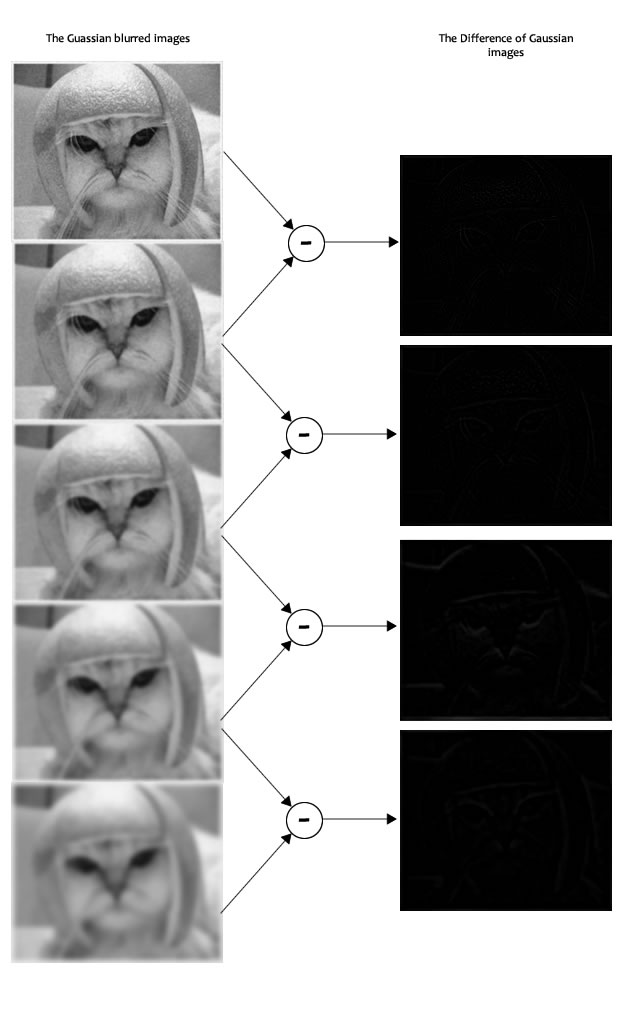 Image source: aishack.in

3. Coarsely locate keypoints (local minimas/maximas) in DoG images:
- compare each pixel with its 8 neighbours at the current, previous and next scale.
- initially, a coarse position of the keypoints is located.
- for getting "subpixel" accuracy, Taylor expansion is used to get the continuum distribution.
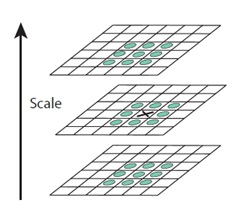 
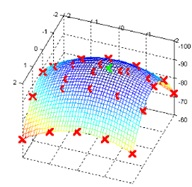
Image source: aishack.in

4. Remove outliers (threshold-based): 
    - edges (removal similar to the Harris corner detection, using the "structure tensor"/Hessian matrix).
    - low contrast features

5. Get the orientation and magnitude for each keypoint:
- the goal of this step is to achieve the invariance of the keypoints to rotation
- process similar to the Histogram of Gradients
- to each keypoint, assign the orientation corresponding to the peak in the histogram (tallest bin).

6. Generating features:
- 16x16 window, divided into 16 blocks of 4x4 windows around each keypoint orientation.
- compute gradient magnitudes and orientations for each window.
- make a histogram of 8 bins.
- the output is a 4x4x8 feature vector.


OpenCV implementation:
- https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_feature2d/py_sift_intro/py_sift_intro.html

In [ ]:
import cv2
import numpy as np

img = cv2.imread('scene1.jpg')
gray= cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

sift = cv2.SIFT()
kp = sift.detect(gray,None)

img=cv2.drawKeypoints(gray,kp)

cv2.imwrite('sift_keypoints.jpg',img)

In [ ]:
#draw the images
img=cv2.drawKeypoints(gray,kp,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
cv2.imwrite('sift_keypoints.jpg',img)

Applications:
- template matching: (finding Waldo in a cluttered scene)
- stitching for panoramic images; in photogrammetry
- registration and alignment of images

Tasks:
 - 1. Read the original paper
 - 2. Try feature matching and finding key correspondences: https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_feature2d/py_matcher/py_matcher.html
 - 3. Try finding an object in a scene (experiment with partial occlusions).
 - 4. Apply SIFT to your project